In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("../Datasets/Iris.csv")
from sklearn.ensemble import BaggingClassifier

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df = df.iloc[:,1:] #select all columns from index 1 ie, remove col "id"

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder=LabelEncoder()


In [14]:
df['Species'] = encoder.fit_transform(df['Species'])

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [17]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

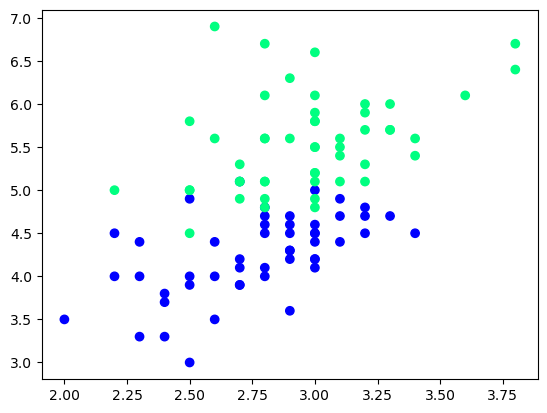

In [19]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [20]:
#taking only 10 rows for training
df = df.sample(100) #random 100 samples
df_train = df.iloc[60:,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)


In [21]:
df_train

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
139,3.1,5.4,2
70,3.2,4.8,1
110,3.2,5.1,2
92,2.6,4.0,1
136,3.4,5.6,2
97,2.9,4.3,1
112,3.0,5.5,2
142,2.7,5.1,2
143,3.2,5.9,2


In [22]:
df_val

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
148,3.4,5.4,2
146,2.5,5.0,2
104,3.0,5.8,2
133,2.8,5.1,2


In [23]:
df_test

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
139,3.1,5.4,2
69,2.5,3.9,1
78,2.9,4.5,1
52,3.1,4.9,1


In [24]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## Case 1 - Bagging

In [25]:
df_bag = df_train.sample(8,replace = True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [26]:
df_bag


,SepalWidthCm,PetalLengthCm,Species
110,3.2,5.1,2
142,2.7,5.1,2
110,3.2,5.1,2
70,3.2,4.8,1
142,2.7,5.1,2
92,2.6,4.0,1
139,3.1,5.4,2
70,3.2,4.8,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
dt_bag1 = DecisionTreeClassifier()

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred= clf.predict(X_test)
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))

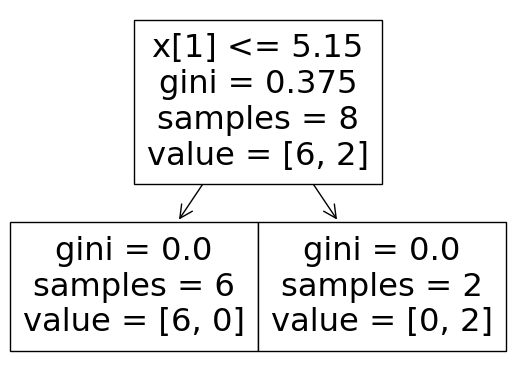

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score :  0.4


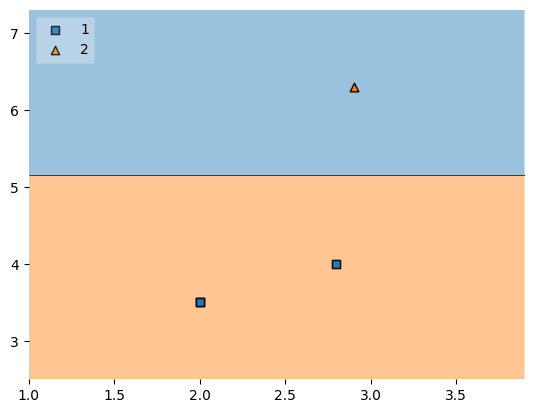

In [ ]:
evaluate(dt_bag1,X,y)

In [ ]:
df_bag = df_train.sample(8,replace = True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
60,2.0,3.5,1
81,2.4,3.7,1
60,2.0,3.5,1
107,2.9,6.3,2
71,2.8,4.0,1
107,2.9,6.3,2
81,2.4,3.7,1


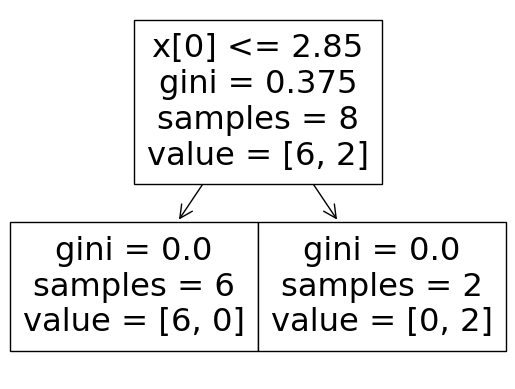

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score :  0.4


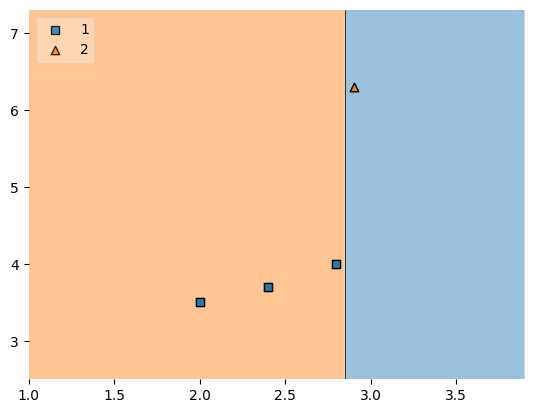

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

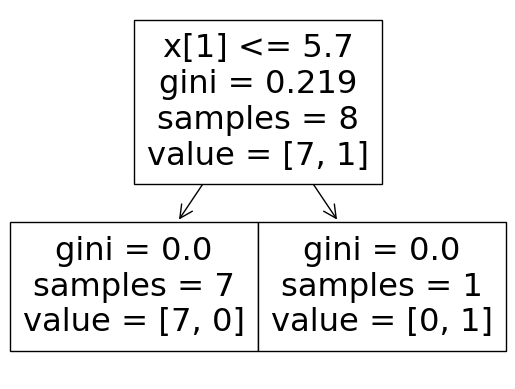

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score :  0.4


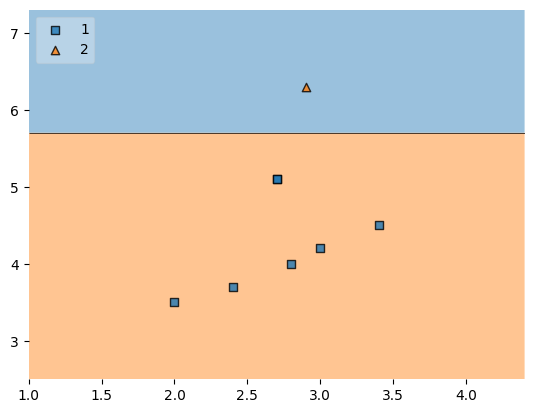

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
120,3.2,5.7,2
78,2.9,4.5,1
86,3.1,4.7,1
50,3.2,4.7,1


In [ ]:
print("Prediction 1",dt_bag1.predict(np.array([3.2,5.7]).reshape(1,2)))
print("Prediction 2",dt_bag2.predict(np.array([3.2,5.7]).reshape(1,2)))
print("Prediction 3",dt_bag3.predict(np.array([3.2,5.7]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [2]
Prediction 3 [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Types of Bagging : Pasting

Row Sampling without Replacement

In [ ]:
df_train.sample(8)  # replace = False

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
81,2.4,3.7,1
94,2.7,4.2,1
85,3.4,4.5,1
120,3.2,5.7,2
71,2.8,4.0,1
83,2.7,5.1,1
107,2.9,6.3,2


# Types of Bagging : Random Subspaces

Column Sampling is used instead of Row Sampling : Could be Replaced or not 

In [ ]:
df1 = pd.read_csv("../Datasets/Iris.csv")

In [ ]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
123,124,6.3,2.7,4.9,1.8,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
12,13,4.8,3.0,1.4,0.1,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa


In [ ]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,SepalLengthCm
52,4.9,6.9
123,4.9,6.3
136,5.6,6.3
130,6.1,7.4
105,6.6,7.6
81,3.7,5.5
12,1.4,4.8
108,5.8,6.7
94,4.2,5.6
36,1.3,5.5


# Types of Bagging : Random Patches
Both Row and Column Sampling is performed. 

In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Species
36,5.5,Iris-setosa
108,6.7,Iris-virginica
36,5.5,Iris-setosa
36,5.5,Iris-setosa
108,6.7,Iris-virginica
136,6.3,Iris-virginica
123,6.3,Iris-virginica
105,7.6,Iris-virginica
